### N=512 Simulation of Stratified Turbulent Jets for N^2=100

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io

In [2]:
file_name_1 = 'DNL_IRFZ_N512_kf6x2pi_eps0p015_Nsq100_1xnu_dt0p001_t00_to_t15.mat'
file_name_2 = 'DNL_IRFZ_N512_kf6x2pi_eps0p015_Nsq100_1xnu_dt0p001_t15_to_t30.mat'
file_name_3 = 'DNL_IRFZ_N512_kf6x2pi_eps0p015_Nsq100_1xnu_dt0p001_t30_to_t45.mat'
file_name_4 = 'DNL_IRFZ_N512_kf6x2pi_eps0p015_Nsq100_1xnu_dt0p001_t45_to_t60.mat'

file_name_list = [file_name_1,file_name_2,file_name_3,file_name_4]

In [3]:
U1 = np.zeros((515,515,15,4))
U2 = np.zeros((515,515,15,4))

In [4]:
for i in np.arange(len(file_name_list)):

    file_name = file_name_list[i]
    
    NL_state = scipy.io.loadmat(file_name)

    U1[:,:,:,i] = NL_state['U1_save']
    U2[:,:,:,i] = NL_state['U2_save']
    ddx_phys = NL_state['ddx_phys']
    ddy_phys = NL_state['ddy_phys']
    TIME_save_flow = NL_state['TIME_save_flow'] 
    
    print(i)

0
1
2
3


In [5]:
# Assuming U1 has shape (515, 515, 15, 4)
# Create a 4D array with the first time chunk (excluding the last time step)
U1_full = U1[:, :, :-1, 0]
U2_full = U2[:, :, :-1, 0]

# Concatenate the remaining time chunks along the time dimension
for i in range(1, 4):  # Assuming you have 4 time chunks
    U1_full = np.concatenate((U1_full, U1[:, :, :-1, i]), axis=2)
    U2_full = np.concatenate((U2_full, U2[:, :, :-1, i]), axis=2)

# Now, concatenated_data has the shape (515, 515, 44), eliminating the redundant overlap

In [6]:
Z_timeseries = np.zeros((512,512,U1_full.shape[2]))

for i in np.arange(U1_full.shape[2]):
    Z_timeseries[:,:,i] = ddx_phys @ U2_full[:512,:512,i] - U1_full[:512,:512,i] @ np.transpose(ddy_phys)
    print(i)

#Z_final = ddx_phys @ U2_save[:512,:512,-1] - U1_save[:512,:512,-1] @ np.transpose(ddy_phys)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


In [27]:
x = np.linspace(0,1,512)
z = np.linspace(0,1,512)

In [34]:
from matplotlib.animation import FuncAnimation

%matplotlib tk
fig, ax = plt.subplots(figsize=(8, 6), dpi = 100)
ax.set(xlim=(0, 1), ylim=(0, 1))

Zmax = .5*np.max(np.abs(Z_timeseries))

cax = ax.pcolormesh(x, z, np.transpose(Z_timeseries[:-1,:-1,0]),vmin=-Zmax, vmax=Zmax, cmap='RdBu_r')
#fig.colorbar(cax)
plt.xlabel('x',fontsize='15')
plt.ylabel('z',fontsize='15')
plt.title('$\zeta$',fontsize='15')

def animate(i):
     cax.set_array(np.transpose(Z_timeseries[:-1,:-1,i]).flatten())

anim = FuncAnimation(
    fig, animate, interval=600, frames=Z_timeseries.shape[2]-1)
 
plt.draw()
plt.show()

#anim.save('Z_movie.gif')

In [35]:
plt.close('all')

In [36]:
%matplotlib inline

### Snapshot of early state

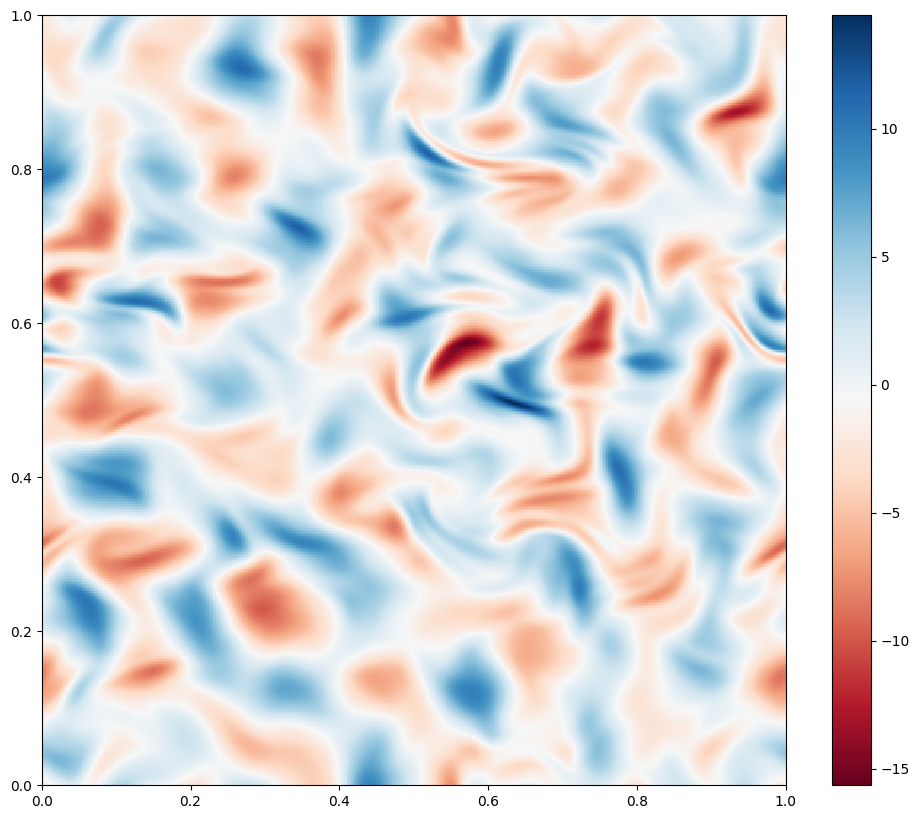

In [37]:
plt.figure(figsize=(12,10))
plt.pcolor(x,z,np.transpose(Z_timeseries[:-1,:-1,3]),cmap='RdBu')
plt.colorbar()

### Snapshot of final state

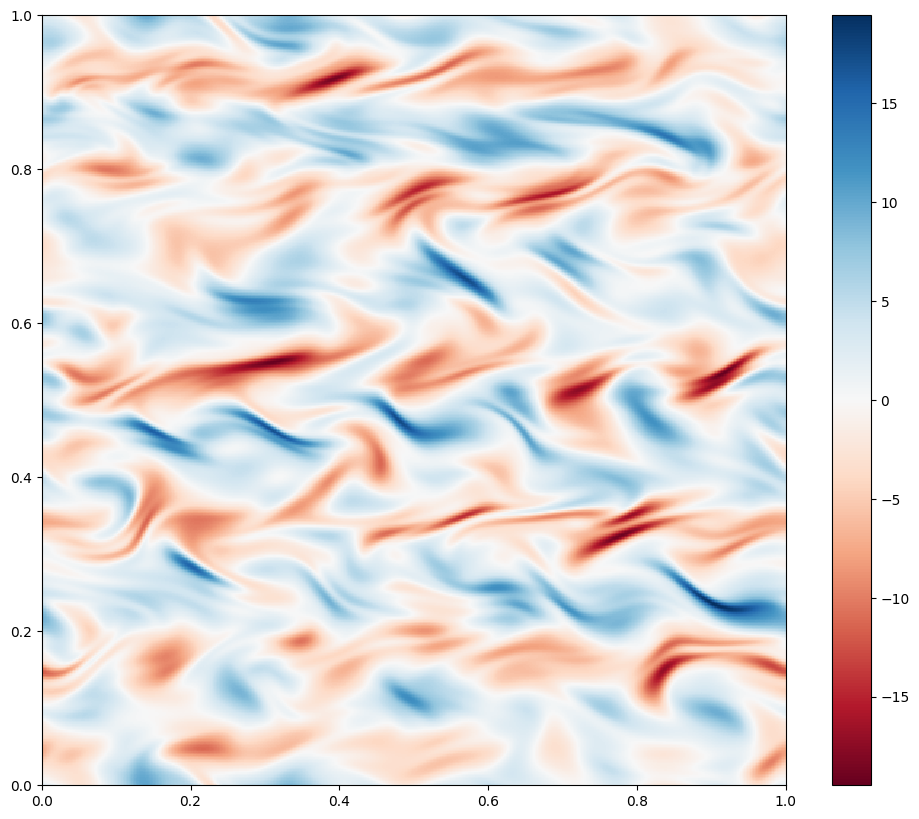

In [38]:
plt.figure(figsize=(12,10))
plt.pcolor(x,z,np.transpose(Z_timeseries[:-1,:-1,-1]),cmap='RdBu')
plt.colorbar()

In [40]:

# Load .mat file
mat_data = scipy.io.loadmat('DNL_IRFZ_N512_kf6x2pi_eps0p015_Nsq100_1xnu_dt0p001_t45_to_t60_diagnostics.mat')

# Access variables in the dictionary
#variable_name = 'your_variable_name'
#data = mat_data[variable_name]

# Now 'data' contains the content of the variable from the .mat file


In [ ]:
print(mat_data.keys())

In [ ]:
SET_QL = mat_data['SET_QL']
print(SET_QL)

In [ ]:
ubar = mat_data['ubar']
print(ubar)

In [ ]:
TIME_save_flow = mat_data['TIME_save_flow']
print(TIME_save_flow)

In [ ]:
K_mean = mat_data['K_mean']
print(K_mean)

In [ ]:
K_prime.shape
TIME_save_flow.shape

In [ ]:
K_prime = mat_data['K_prime']
print(K_prime)

In [ ]:
plt.plot(np.transpose(TIME_save_flow),K_prime,'-r')
plt.plot(np.transpose(TIME_save_flow),K_mean,'-b')

In [ ]:
ubar.shape

In [ ]:
z = np.linspace(0,1,512)

In [ ]:
plt.plot(ubar[:,-1],z,'-ob')

In [ ]:
plt.pcolor(TIME_save_flow,z,ubar)

In [ ]:
os.chdir('Nsq_100_N512_t45_to_t60/')

In [ ]:
%ls

In [ ]:
NL_state = scipy.io.loadmat('DNL_IRFZ_N512_kf6x2pi_eps0p015_Nsq100_1xnu_dt0p001_t45_to_t60.mat')

In [ ]:
print(NL_state.keys())

In [ ]:
U1_save = NL_state['U1_save']
U2_save = NL_state['U2_save']
ddx_phys = NL_state['ddx_phys']
ddy_phys = NL_state['ddy_phys']

In [ ]:
TIME_save_flow.shape[1]

In [41]:
x = np.linspace(0,1,512)
x = np.linspace(0,1,512)
plt.pcolor(x,z,np.transpose(Z_final),cmap='RdBu')
plt.colorbar()

NameError: name 'Z_final' is not defined

In [ ]:
from matplotlib.animation import FuncAnimation

%matplotlib tk
fig, ax = plt.subplots(figsize=(8, 6))
ax.set(xlim=(0, 1), ylim=(0, 1))

Zmax = 1*np.max(np.abs(Z_timeseries))

cax = ax.pcolormesh(x, z, np.transpose(Z_timeseries[:-1,:-1,0]),vmin=-Zmax, vmax=Zmax, cmap='RdBu_r')
#fig.colorbar(cax)
plt.xlabel('x',fontsize='15')
plt.ylabel('z',fontsize='15')
plt.title('$\zeta$',fontsize='15')

def animate(i):
     cax.set_array(np.transpose(Z_timeseries[:-1,:-1,i]).flatten())

anim = FuncAnimation(
    fig, animate, interval=200, frames=TIME_save_flow.shape[1]-1)
 
plt.draw()
plt.show()

#anim.save('q_movie_1xeps.gif')

In [ ]:
plt.close('all')

In [ ]:
U2_save[inds,np.transpose(inds),-1].shape

In [ ]:
inds = np.arange(0,512)
U2_save[inds,inds,-1].shape

In [ ]:
inds

In [ ]:
ddx_phys

In [ ]:
ddy_phys

In [ ]:
plt.pcolor(np.transpose(U1_save[0:511,0:511,-1]))

In [ ]:
plt.plot(U1_save[:,10,-1],'-o')

In [ ]:
print(U1_save[0,10,-1])
print(U1_save[1,10,-1])
print(U1_save[2,10,-1])
print(U1_save[-3,10,-1])
print(U1_save[-2,10,-1])
print(U1_save[-1,10,-1])

# so 0,1,2 are the same as 512,513,514

In [ ]:
print(U1_save[0,10,-1])
print(U1_save[511,10,-1])

In [ ]:
np.shape(U1_save[0:512,:,:])

In [ ]:
U1_save.shape

In [ ]:
U1_snap = NL_state['U1_snap']

In [ ]:
U1_snap.shape